<a href="https://colab.research.google.com/github/CoderPranavRaj/AIrline_Passenger_Referral_Prediction/blob/main/ML_Classification_Submission.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Project Name**    - Airline passenger referral prediction



##### **Project Type**    - Classification
##### **Contribution**    - Team
##### **Team Member 1 -**
##### **Team Member 2 -**
##### **Team Member 3 -**
##### **Team Member 4 -**

# **Project Summary -**

Write the summary here within 500-600 words.

# **GitHub Link -**

Provide your GitHub Link here.

# **Problem Statement**


**Write Problem Statement Here.**

# **General Guidelines** : -  

1.   Well-structured, formatted, and commented code is required. 
2.   Exception Handling, Production Grade Code & Deployment Ready Code will be a plus. Those students will be awarded some additional credits. 
     
     The additional credits will have advantages over other students during Star Student selection.
       
             [ Note: - Deployment Ready Code is defined as, the whole .ipynb notebook should be executable in one go
                       without a single error logged. ]

3.   Each and every logic should have proper comments.
4. You may add as many number of charts you want. Make Sure for each and every chart the following format should be answered.
        

```
# Chart visualization code
```
            

*   Why did you pick the specific chart?
*   What is/are the insight(s) found from the chart?
* Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

5. You have to create at least 15 logical & meaningful charts having important insights.


[ Hints : - Do the Vizualization in  a structured way while following "UBM" Rule. 

U - Univariate Analysis,

B - Bivariate Analysis (Numerical - Categorical, Numerical - Numerical, Categorical - Categorical)

M - Multivariate Analysis
 ]





6. You may add more ml algorithms for model creation. Make sure for each and every algorithm, the following format should be answered.


*   Explain the ML Model used and it's performance using Evaluation metric Score Chart.


*   Cross- Validation & Hyperparameter Tuning

*   Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

*   Explain each evaluation metric's indication towards business and the business impact pf the ML model used.




















# ***Let's Begin !***

## ***1. Know Your Data***

### Import Libraries

In [ ]:
# Importing important Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
from datetime import datetime
%matplotlib inline

In [ ]:
# Importing  metrics for evaluation for our models
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn.metrics import auc


import warnings
warnings.filterwarnings('ignore')

### Dataset Loading

In [ ]:
# Load Dataset
from google.colab import drive
drive.mount("/content/drive")
path='/content/drive/MyDrive'

Mounted at /content/drive


In [ ]:
Airline_df=pd.read_excel(path+'/data_airline_reviews.xlsx')

### Dataset First View

In [ ]:
# Dataset First Look
Airline_df.tail(10)

,airline,overall,author,review_date,customer_review,aircraft,traveller_type,cabin,route,date_flown,seat_comfort,cabin_service,food_bev,entertainment,ground_service,value_for_money,recommended
131885,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
131886,Ukraine International,NaN,Yevheniy Kahanovych,21st January 2007,Two domestic flights between Kiev and Lviv las...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,no
131887,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
131888,Ukraine International,NaN,Helen Lee,15th December 2006,I had a good flight from London to Kiev with U...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,no
131889,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
131890,Ukraine International,NaN,Andriy Yesypenko,19th May 2006,Kiev - London (Gatwick) in business class (in ...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,no
131891,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
131892,Ukraine International,NaN,Volodya Bilotkach,29th April 2006,Several flights - KBP to AMS (3 times one way)...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,no
131893,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
131894,Ukraine International,NaN,Kasper Hettinga,10th February 2006,KBP-AMS with UIA. Although it was a relatively...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,no


### Dataset Rows & Columns count

In [ ]:
# Dataset Columns count
len(Airline_df.columns)

17

In [ ]:
#Dataset Rows count
len(Airline_df. index)

131895

In [ ]:
Airline_df.shape

(131895, 17)

### Dataset Information

In [ ]:
# Dataset Info
Airline_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 131895 entries, 0 to 131894
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   airline          65947 non-null  object 
 1   overall          64017 non-null  float64
 2   author           65947 non-null  object 
 3   review_date      65947 non-null  object 
 4   customer_review  65947 non-null  object 
 5   aircraft         19718 non-null  object 
 6   traveller_type   39755 non-null  object 
 7   cabin            63303 non-null  object 
 8   route            39726 non-null  object 
 9   date_flown       39633 non-null  object 
 10  seat_comfort     60681 non-null  float64
 11  cabin_service    60715 non-null  float64
 12  food_bev         52608 non-null  float64
 13  entertainment    44193 non-null  float64
 14  ground_service   39358 non-null  float64
 15  value_for_money  63975 non-null  float64
 16  recommended      64440 non-null  object 
dtypes: float64

#### Duplicate Values

In [ ]:
# Dataset Duplicate Value Count
Airline_df.duplicated().sum()

70711

In [ ]:
Airline_df.drop_duplicates(inplace=True)

In [ ]:
#Checking uniuqe airlines counts
Airline_df['airline'].value_counts()

Spirit Airlines           2934
American Airlines         2867
United Airlines           2829
British Airways           2811
Cathay Pacific Airways    2402
                          ... 
QantasLink                 105
Adria Airways               85
Air Arabia                  80
Tunisair                    71
Thai Smile Airways          48
Name: airline, Length: 81, dtype: int64

In [ ]:
#Checking unique airlines
len(Airline_df['airline'].unique())

82

In [ ]:
#Checking unique authors
len(Airline_df['author'].unique())

44070

In [ ]:
#repetead author count
Airline_df['author'].duplicated().sum()

17114

#### Missing Values/Null Values

In [ ]:
# Missing Values/Null Values Count
Airline_df.isnull().sum()

airline                1
overall             1783
author                 1
review_date            1
customer_review        1
aircraft           42696
traveller_type     23644
cabin               2479
route              23671
date_flown         23750
seat_comfort        4973
cabin_service       4944
food_bev           12843
entertainment      20954
ground_service     24015
value_for_money     1857
recommended         1423
dtype: int64

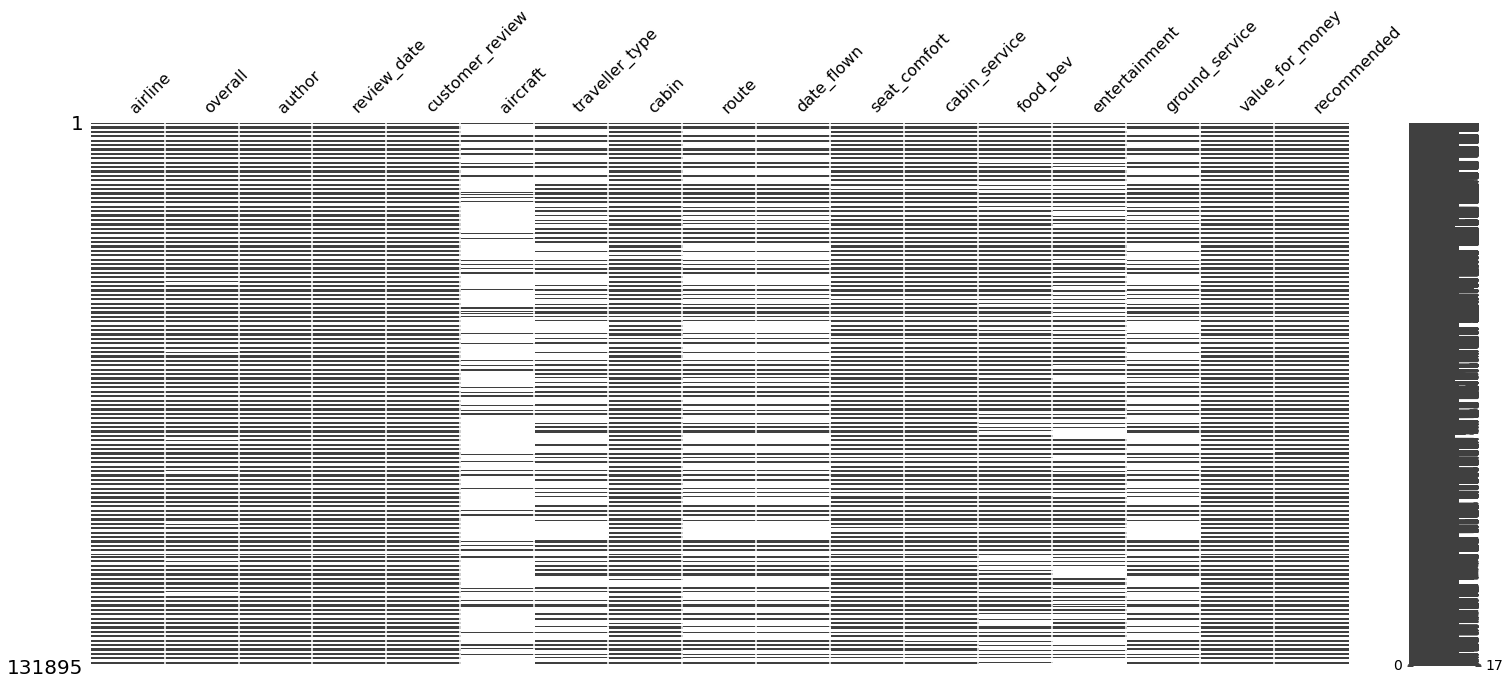

In [ ]:
# Visualizing the missing values
msno.matrix(Airline_df)

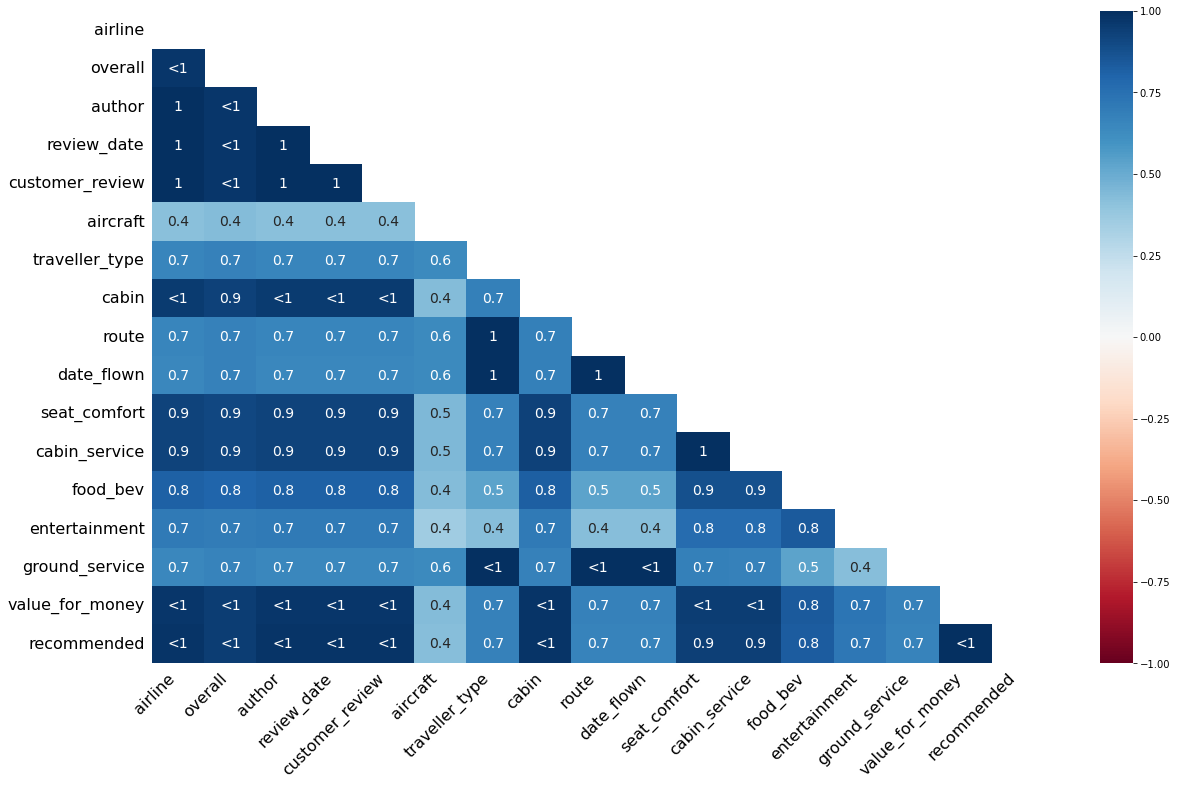

In [ ]:
#Visulize relation of nullvalues through heatmap
msno.heatmap(Airline_df)

### What did you know about your dataset?

Data has a lot of missing values.lot of work needed to clean data

## ***2. Understanding Your Variables***

In [ ]:
# Dataset Columns
Airline_df.columns

Index(['airline', 'overall', 'author', 'review_date', 'customer_review',
       'aircraft', 'traveller_type', 'cabin', 'route', 'date_flown',
       'seat_comfort', 'cabin_service', 'food_bev', 'entertainment',
       'ground_service', 'value_for_money', 'recommended'],
      dtype='object')

In [ ]:
# Dataset Describe
Airline_df.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
airline,61183,81,Spirit Airlines,2871,NaN,NaN,NaN,NaN,NaN,NaN,NaN
overall,59401.0,NaN,NaN,NaN,5.164863,3.483701,1.0,1.0,5.0,9.0,10.0
author,61183,44069,Anders Pedersen,93,NaN,NaN,NaN,NaN,NaN,NaN,NaN
review_date,61183,3015,19th January 2015,198,NaN,NaN,NaN,NaN,NaN,NaN,NaN
customer_review,61183,61172,I flew from Chicago O'Hare to Dublin and from ...,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN
aircraft,18488,2088,A320,2130,NaN,NaN,NaN,NaN,NaN,NaN,NaN
traveller_type,37540,4,Solo Leisure,13935,NaN,NaN,NaN,NaN,NaN,NaN,NaN
cabin,58705,4,Economy Class,45171,NaN,NaN,NaN,NaN,NaN,NaN,NaN
route,37513,24549,BKK to LHR,31,NaN,NaN,NaN,NaN,NaN,NaN,NaN
date_flown,37434,63,August 2015,1127,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### Variables Description 

Answer Here

### Check Unique Values for each variable.

In [ ]:
# Check Unique Values for each variable.
Airline_df['airline'].unique()

array(['Turkish Airlines', 'Qatar Airways', 'Emirates', 'Lufthansa',
       'KLM Royal Dutch Airlines', 'Virgin America', 'American Airlines',
       'Delta Air Lines', 'Southwest Airlines', 'United Airlines',
       'Jetblue Airways', 'Aegean Airlines', 'Aeroflot Russian Airlines',
       'Aeromexico', 'Air Canada', 'Air New Zealand', 'Alitalia',
       'AirAsia', 'Asiana Airlines', 'Avianca', 'Austrian Airlines',
       'British Airways', 'Brussels Airlines', 'China Eastern Airlines',
       'China Southern Airlines', 'Copa Airlines', 'Ethiopian Airlines',
       'Egyptair', 'Finnair', 'Iberia', 'ANA All Nippon Airways',
       'easyJet', 'Korean Air', 'LATAM Airlines', 'LOT Polish Airlines',
       'Qantas Airways', 'Air France', 'Etihad Airways',
       'Pegasus Airlines', 'Royal Jordanian Airlines', 'Ryanair',
       'South African Airways', 'Saudi Arabian Airlines', 'TAP Portugal',
       'Eurowings', 'EVA Air', 'Royal Air Maroc', 'Singapore Airlines',
       'SAS Scandinavian', 

In [ ]:
#There are 82 unique airlines in our data 

In [ ]:
print(Airline_df['author'].nunique())
print(Airline_df['customer_review'].nunique())
print(Airline_df['aircraft'].nunique())
print(Airline_df['route'].nunique())

44069
61172
2088
24549


In [ ]:
#Checking unique traveller_type and Cabin
print(Airline_df['traveller_type'].unique())
print(Airline_df['cabin'].unique())

['Business' 'Family Leisure' 'Solo Leisure' 'Couple Leisure' nan]
['Economy Class' 'Business Class' nan 'Premium Economy' 'First Class']


## 3. ***Data Wrangling***

### Data Wrangling Code

In [ ]:
#Droping rows with null values in entire row 
Airline_df.dropna(how='all',inplace=True) 

In [ ]:
Airline_df.head()

,airline,overall,author,review_date,customer_review,aircraft,traveller_type,cabin,route,date_flown,seat_comfort,cabin_service,food_bev,entertainment,ground_service,value_for_money,recommended
1,Turkish Airlines,7.0,Christopher Hackley,8th May 2019,âœ… Trip Verified | London to Izmir via Istanb...,NaN,Business,Economy Class,London to Izmir via Istanbul,2019-05-01 00:00:00,4.0,5.0,4.0,4.0,2.0,4.0,yes
3,Turkish Airlines,2.0,Adriana Pisoi,7th May 2019,âœ… Trip Verified | Istanbul to Bucharest. We ...,NaN,Family Leisure,Economy Class,Istanbul to Bucharest,2019-05-01 00:00:00,4.0,1.0,1.0,1.0,1.0,1.0,no
5,Turkish Airlines,3.0,M Galerko,7th May 2019,âœ… Trip Verified | Rome to Prishtina via Ista...,NaN,Business,Economy Class,Rome to Prishtina via Istanbul,2019-05-01 00:00:00,1.0,4.0,1.0,3.0,1.0,2.0,no
7,Turkish Airlines,10.0,Zeshan Shah,6th May 2019,âœ… Trip Verified | Flew on Turkish Airlines I...,A330,Solo Leisure,Economy Class,Washington Dulles to Karachi,April 2019,4.0,5.0,5.0,5.0,5.0,5.0,yes
9,Turkish Airlines,1.0,Pooja Jain,6th May 2019,âœ… Trip Verified | Mumbai to Dublin via Istan...,NaN,Solo Leisure,Economy Class,Mumbai to Dublin via Istanbul,2019-05-01 00:00:00,1.0,1.0,1.0,1.0,1.0,1.0,no


In [ ]:
#Chnaging date_flown to Datetime object
Airline_df['date_flown'] = Airline_df['date_flown'].apply(lambda x:pd.to_datetime(x))

In [ ]:
#Creating new month feature from date flown to see the month with most flights
Airline_df['travel_month'] = Airline_df['date_flown'].dt.month

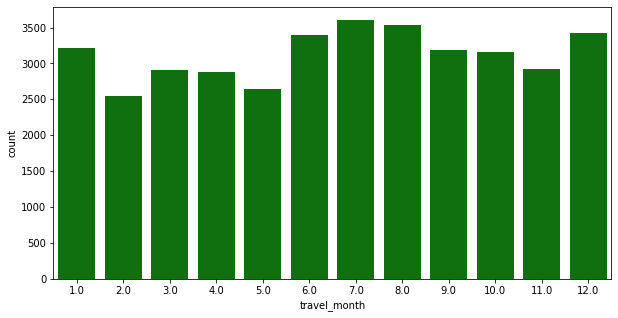

In [ ]:
# Get countplot of 'travel_month' feature
plt.figure(figsize=(10,5))
sns.countplot(Airline_df['travel_month'],color ='g')

In [ ]:
#July has the highest no.of flights flown followed by august,december and january

### What all manipulations have you done and insights you found?

Answer Here.

## ***4. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables***

#### Chart - 1

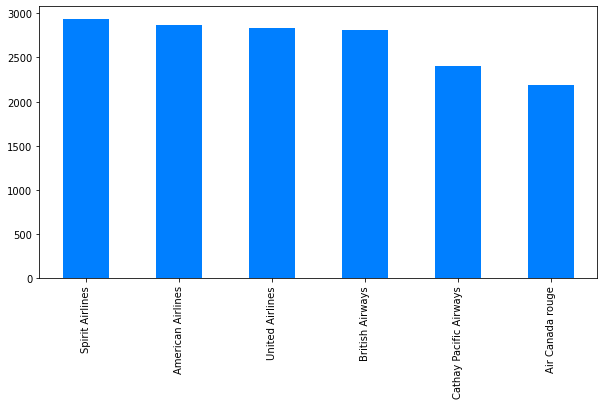

In [ ]:
# Visualize the top most frequently used airlines
sns.set_palette('gist_ncar')
plt.figure(figsize=(10,5))
Airline_df['airline'].value_counts()[0:6].plot(kind='bar',figsize=(10,5))

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 2

Text(0, 0.5, 'Food_bev rating')

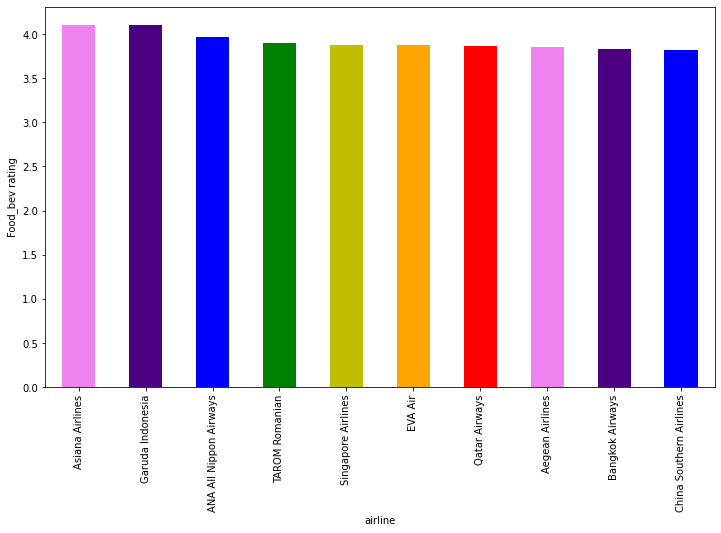

In [ ]:
# Top airlines which lead in food_bev segment
plt.rcParams['figure.figsize'] = (12, 7)
Airline_df.groupby(['airline'])['food_bev'].mean().sort_values(ascending=False).head(10).plot.bar(color = ['violet','indigo','b','g','y','orange','r'])
plt.ylabel('Food_bev rating')

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 3

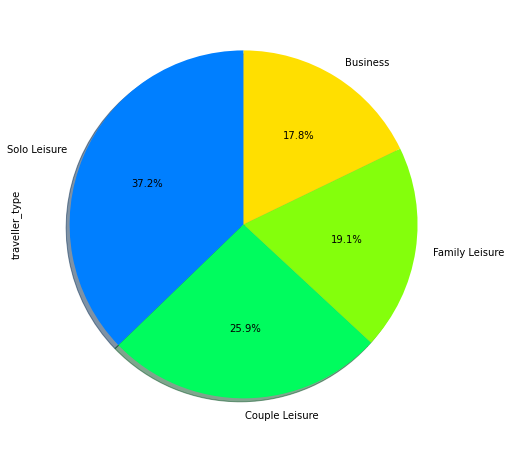

In [ ]:
# Traveller_types visualization
Airline_df['traveller_type'].value_counts().plot(kind='pie',autopct='%1.1f%%',figsize=(15,8),shadow=True,startangle=90)

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 4

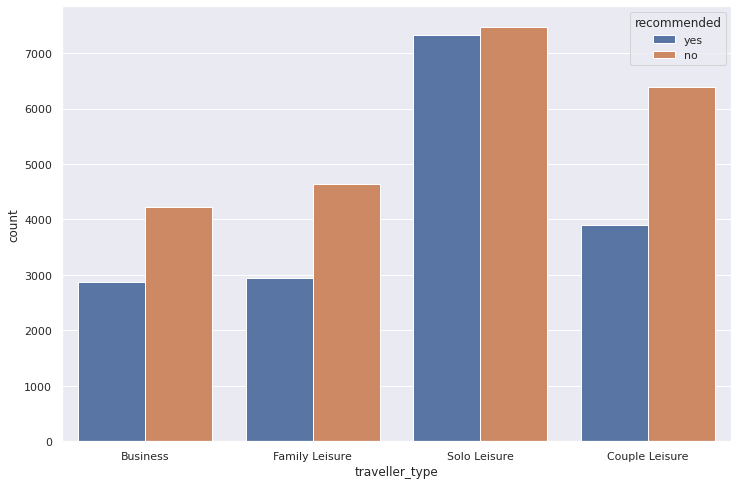

In [ ]:
# Visulization to check recommendtion pattern in traveller_types
sns.set(style="darkgrid")
plt.figure(figsize=(12,8))
ax=sns.countplot(x='traveller_type',hue='recommended',data=Airline_df)
plt.show()

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 5

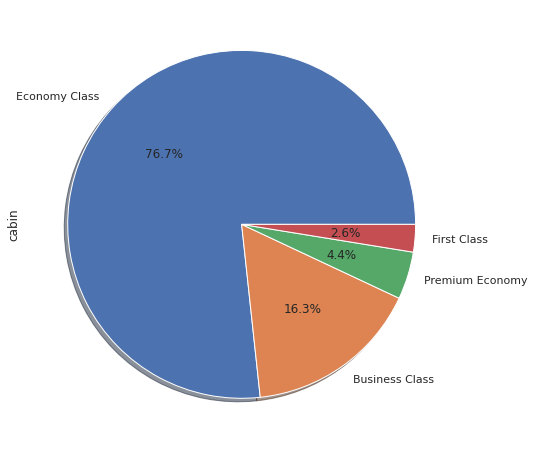

In [ ]:
# visualization of cabin types
Airline_df['cabin'].value_counts().plot(kind='pie',autopct='%1.1f%%',figsize=(15,8),shadow=True)

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 6

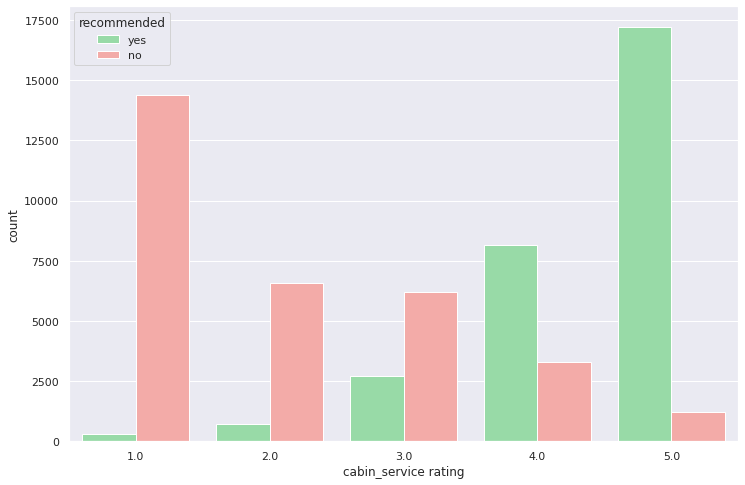

In [ ]:
# Visualization to check is cabin service score a determinant of recommendation
sns.set(style="darkgrid")
plt.figure(figsize=(12,8))
ax=sns.countplot(x='cabin_service',hue='recommended',data=Airline_df,palette=['#8de5a1','#ff9f9b'])
plt.xlabel('cabin_service rating')
plt.show()

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 7

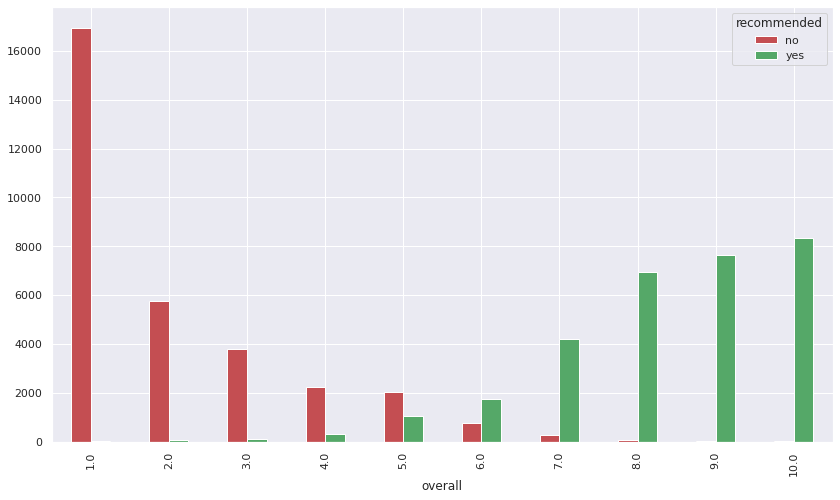

In [ ]:
# Visualization to check is overall rating is a determinant of recommendation
Airline_df.groupby(['overall'])['recommended'].value_counts().unstack().plot.bar(color=['r','g'],figsize=(14,8))

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 8

Text(0.5, 0, 'overall Rating')

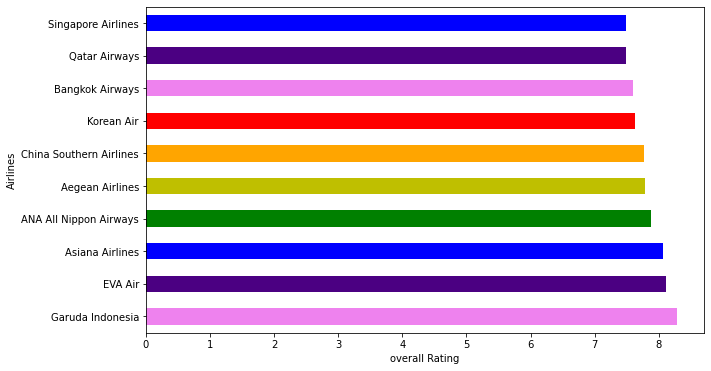

In [ ]:
# Top 10 airlines with respect to Overall points
plt.figure(figsize=(10,6))
Airline_df.groupby(['airline'])['overall'].mean().sort_values(ascending=False).head(10).plot.barh(color = ['violet','indigo','b','g','y','orange','r'])
plt.ylabel('Airlines')
plt.xlabel('overall Rating')

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 9

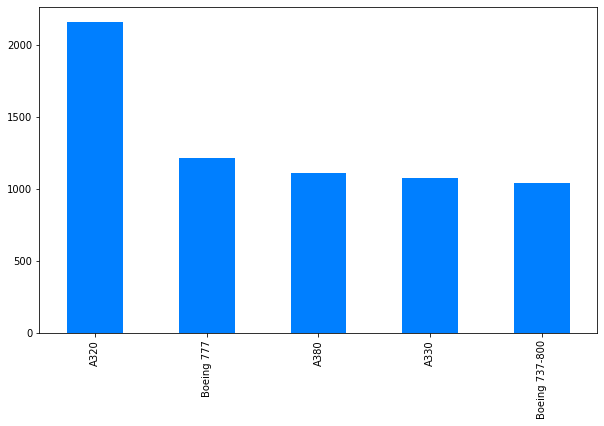

In [ ]:
# Top most frequently used aircrafts
plt.figure(figsize=(10,6))
Airline_df['aircraft'].value_counts().sort_values(ascending=False).head().plot.bar()

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 10

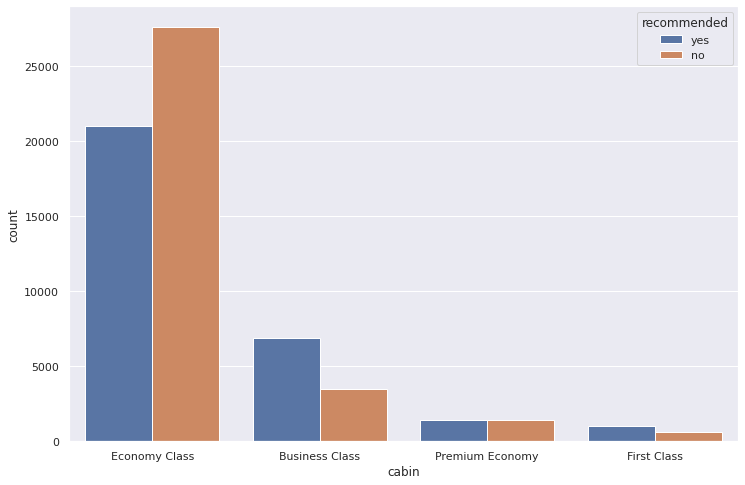

In [ ]:
# visualization to check recomendation pattern in cabin types
sns.set(style="darkgrid")
plt.figure(figsize=(12,8))
ax=sns.countplot(x='cabin',hue='recommended',data=Airline_df)
plt.show()

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 11

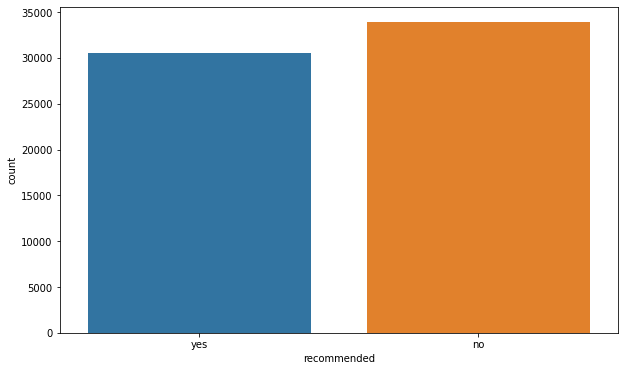

In [ ]:
# Checking class balance
plt.figure(figsize=(10,6))
sns.countplot(x=Airline_df['recommended'])

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 12

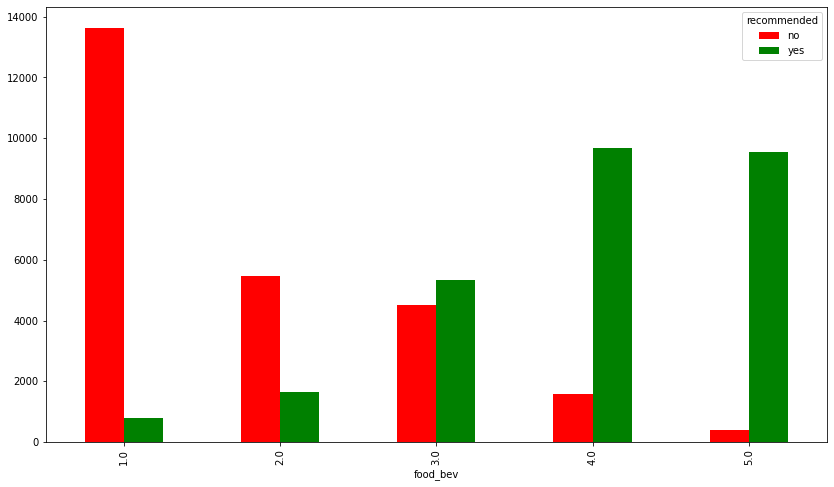

In [ ]:
# Visualization to check is food_bev is a determinant of recommendation
Airline_df.groupby(['food_bev'])['recommended'].value_counts().unstack().plot.bar(color=['r','g'],figsize=(14,8))

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 13

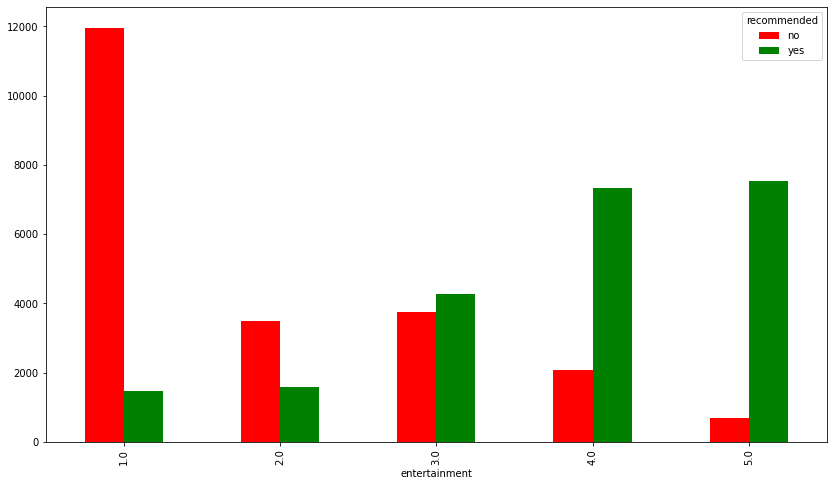

In [ ]:
# Visualization to check is entertainment is a determinant of recommendation
Airline_df.groupby(['entertainment'])['recommended'].value_counts().unstack().plot.bar(color=['r','g'],figsize=(14,8))

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 14 - Correlation Heatmap

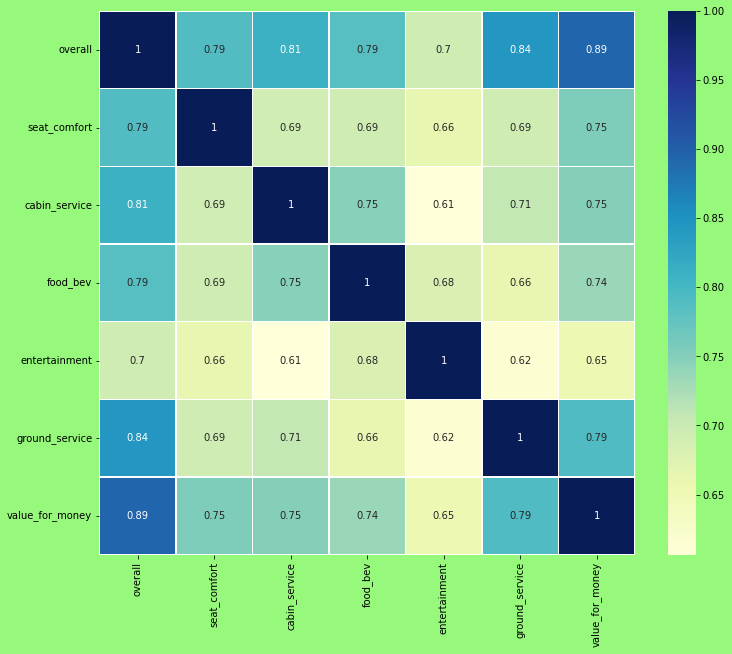

In [ ]:
# Correlation Heatmap visualization code
plt.figure(figsize=(12,10),edgecolor='k',facecolor='xkcd:light green')
sns.heatmap(Airline_df.corr(),annot=True,cmap='YlGnBu',linewidths=.5)

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

## ***5. Hypothesis Testing***

### Based on your chart experiments, define three hypothetical statements from the dataset. In the next three questions, perform hypothesis testing to obtain final conclusion about the statements through your code and statistical testing.

Answer Here.

### Hypothetical Statement - 1

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

Answer Here.

#### 2. Perform an appropriate statistical test.

In [ ]:
# Perform Statistical Test to obtain P-Value

##### Which statistical test have you done to obtain P-Value?

Answer Here.

##### Why did you choose the specific statistical test?

Answer Here.

### Hypothetical Statement - 2

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

Answer Here.

#### 2. Perform an appropriate statistical test.

In [ ]:
# Perform Statistical Test to obtain P-Value

##### Which statistical test have you done to obtain P-Value?

Answer Here.

##### Why did you choose the specific statistical test?

Answer Here.

### Hypothetical Statement - 3

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

Answer Here.

#### 2. Perform an appropriate statistical test.

In [ ]:
# Perform Statistical Test to obtain P-Value

##### Which statistical test have you done to obtain P-Value?

Answer Here.

##### Why did you choose the specific statistical test?

Answer Here.

## ***6. Feature Engineering & Data Pre-processing***

### 1. Handling Missing Values

In [ ]:
# Handling Missing Values & Missing Value Imputation
def show_missing():
    missing = Airline_df.columns[Airline_df.isnull().any()].tolist()
    return missing

# Missing data counts and percentage
print('Missing Data Count')
print(Airline_df[show_missing()].isnull().sum().sort_values(ascending = False))
print('--'*50)
print('Missing Data Percentage')
print(round(Airline_df[show_missing()].isnull().sum().sort_values(ascending = False)/len(Airline_df)*100,2))

Missing Data Count
aircraft           42695
ground_service     24014
date_flown         23749
travel_month       23749
route              23670
traveller_type     23643
entertainment      20953
food_bev           12842
seat_comfort        4972
cabin_service       4943
cabin               2478
value_for_money     1856
overall             1782
recommended         1422
dtype: int64
----------------------------------------------------------------------------------------------------
Missing Data Percentage
aircraft           69.78
ground_service     39.25
date_flown         38.82
travel_month       38.82
route              38.69
traveller_type     38.64
entertainment      34.25
food_bev           20.99
seat_comfort        8.13
cabin_service       8.08
cabin               4.05
value_for_money     3.03
overall             2.91
recommended         2.32
dtype: float64


In [ ]:
Airline_df.isnull().sum()

airline                0
overall             1782
author                 0
review_date            0
customer_review        0
aircraft           42695
traveller_type     23643
cabin               2478
route              23670
date_flown         23749
seat_comfort        4972
cabin_service       4943
food_bev           12842
entertainment      20953
ground_service     24014
value_for_money     1856
recommended         1422
travel_month       23749
dtype: int64

In [ ]:
# Features with over 50% of its observations missings will be removed and features whhich are not important
Airline_df = Airline_df.drop(['aircraft','travel_month','route','review_date','date_flown','author'],axis = 1)

In [ ]:
numerical_df = Airline_df[['overall','seat_comfort','cabin_service','food_bev','entertainment','ground_service', 'value_for_money']]

In [ ]:
# Filling numerical features null values with KNN Imputer
from sklearn.impute import KNNImputer
imputer = KNNImputer(n_neighbors=5)
numerical_df = pd.DataFrame(imputer.fit_transform(numerical_df),columns = numerical_df.columns)

In [ ]:
numerical_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 61183 entries, 0 to 61182
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   overall          61183 non-null  float64
 1   seat_comfort     61183 non-null  float64
 2   cabin_service    61183 non-null  float64
 3   food_bev         61183 non-null  float64
 4   entertainment    61183 non-null  float64
 5   ground_service   61183 non-null  float64
 6   value_for_money  61183 non-null  float64
dtypes: float64(7)
memory usage: 3.3 MB


In [ ]:
cat_df = Airline_df.drop(columns=['overall','seat_comfort','cabin_service','food_bev','entertainment','ground_service', 'value_for_money'])

In [ ]:
cat_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 61183 entries, 1 to 131894
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   airline          61183 non-null  object
 1   customer_review  61183 non-null  object
 2   traveller_type   37540 non-null  object
 3   cabin            58705 non-null  object
 4   recommended      59761 non-null  object
dtypes: object(5)
memory usage: 2.8+ MB


In [ ]:
df = pd.concat([cat_df.reset_index(),numerical_df.reset_index()], axis =1)

In [ ]:
df.drop(columns='index',inplace=True,axis=1)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 61183 entries, 0 to 61182
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   airline          61183 non-null  object 
 1   customer_review  61183 non-null  object 
 2   traveller_type   37540 non-null  object 
 3   cabin            58705 non-null  object 
 4   recommended      59761 non-null  object 
 5   overall          61183 non-null  float64
 6   seat_comfort     61183 non-null  float64
 7   cabin_service    61183 non-null  float64
 8   food_bev         61183 non-null  float64
 9   entertainment    61183 non-null  float64
 10  ground_service   61183 non-null  float64
 11  value_for_money  61183 non-null  float64
dtypes: float64(7), object(5)
memory usage: 5.6+ MB


In [ ]:
df['recommended'].replace({'yes':1,'no':0},inplace=True)

In [ ]:
df['recommended'].isna().sum()

1422

In [ ]:
df.head()

,airline,customer_review,traveller_type,cabin,recommended,overall,seat_comfort,cabin_service,food_bev,entertainment,ground_service,value_for_money
0,Turkish Airlines,âœ… Trip Verified | London to Izmir via Istanb...,Business,Economy Class,1.0,7.0,4.0,5.0,4.0,4.0,2.0,4.0
1,Turkish Airlines,âœ… Trip Verified | Istanbul to Bucharest. We ...,Family Leisure,Economy Class,0.0,2.0,4.0,1.0,1.0,1.0,1.0,1.0
2,Turkish Airlines,âœ… Trip Verified | Rome to Prishtina via Ista...,Business,Economy Class,0.0,3.0,1.0,4.0,1.0,3.0,1.0,2.0
3,Turkish Airlines,âœ… Trip Verified | Flew on Turkish Airlines I...,Solo Leisure,Economy Class,1.0,10.0,4.0,5.0,5.0,5.0,5.0,5.0
4,Turkish Airlines,âœ… Trip Verified | Mumbai to Dublin via Istan...,Solo Leisure,Economy Class,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0


In [ ]:
df = df[df['recommended'].notna()]

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 59761 entries, 0 to 61182
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   airline          59761 non-null  object 
 1   customer_review  59761 non-null  object 
 2   traveller_type   37539 non-null  object 
 3   cabin            58704 non-null  object 
 4   recommended      59761 non-null  float64
 5   overall          59761 non-null  float64
 6   seat_comfort     59761 non-null  float64
 7   cabin_service    59761 non-null  float64
 8   food_bev         59761 non-null  float64
 9   entertainment    59761 non-null  float64
 10  ground_service   59761 non-null  float64
 11  value_for_money  59761 non-null  float64
dtypes: float64(8), object(4)
memory usage: 5.9+ MB


#### What all missing value imputation techniques have you used and why did you use those techniques?

Answer Here.

### 2. Handling Outliers

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


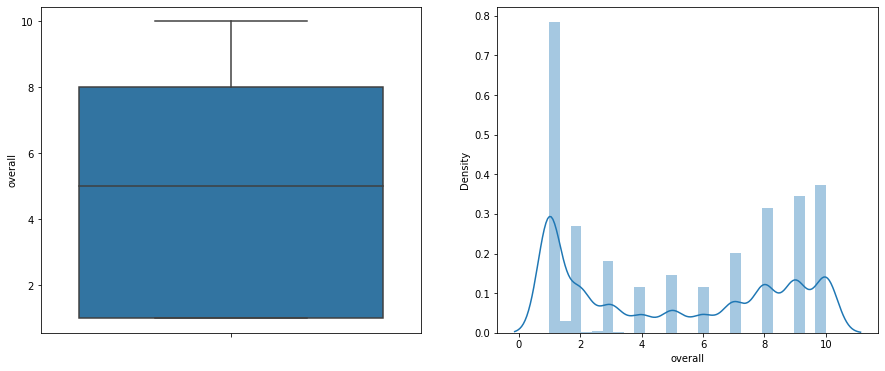

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


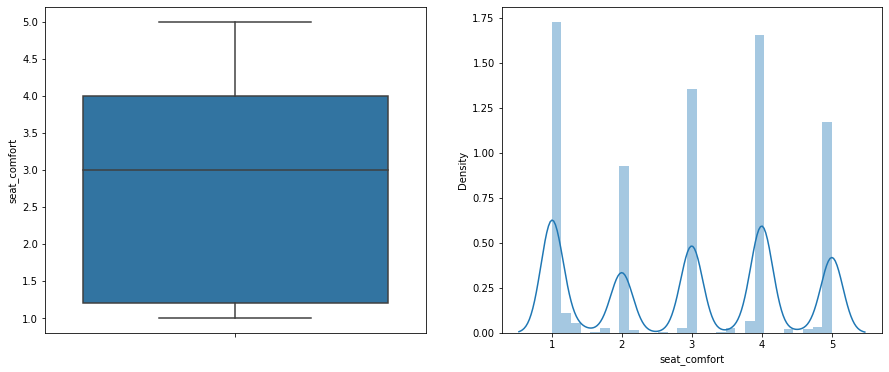

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


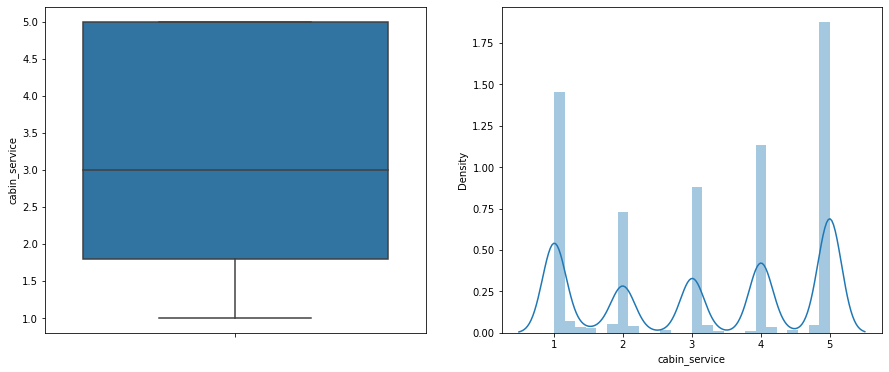

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


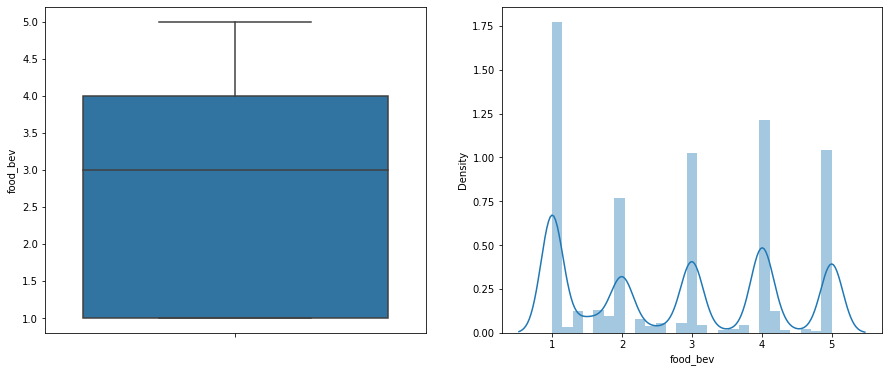

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


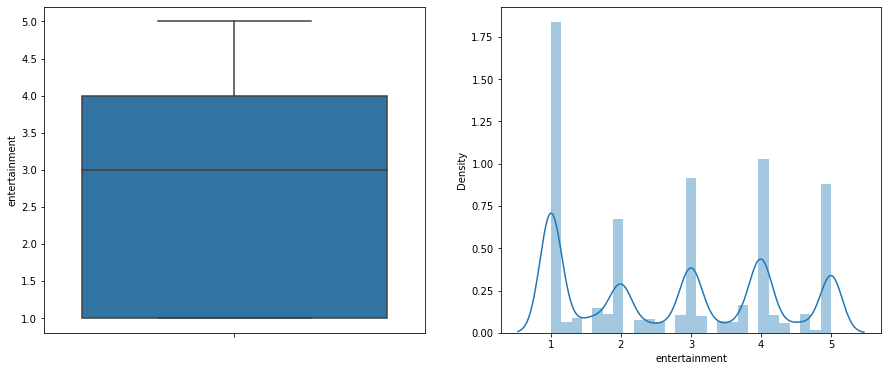

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


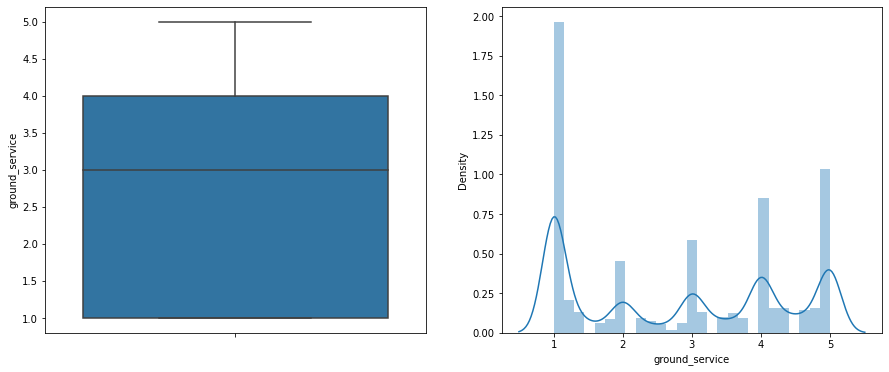

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


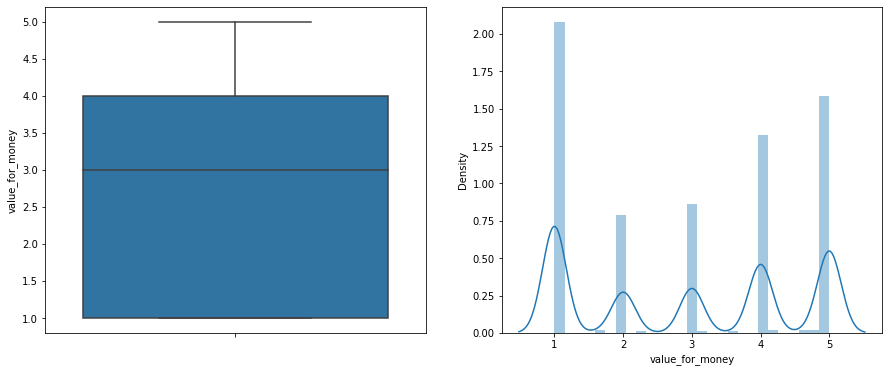

In [ ]:
# Handling Outliers & Outlier treatments

for var in numerical_df:
    plt.figure(figsize=(15,6))
    plt.subplot(1, 2, 1)
    fig = sns.boxplot(y=numerical_df[var])
    fig.set_title('')
    fig.set_ylabel(var)
    
    plt.subplot(1, 2, 2)
    fig = sns.distplot(numerical_df[var].dropna())
    fig.set_xlabel(var)

    plt.show()

##### What all outlier treatment techniques have you used and why did you use those techniques?

Answer Here.

### 3. Categorical Encoding

In [ ]:
# Encoding ordinal data that is cabin type
df['cabin'] = df['cabin'].map({'Economy Class':4,'Business Class':2,'Premium Economy':3,'First Class':1}) 

In [ ]:
# Encoding categorical columns
categorical_columns =['airline','traveller_type']
Data = pd.get_dummies(df,columns=categorical_columns)

In [ ]:
Data.columns

Index(['customer_review', 'cabin', 'recommended', 'overall', 'seat_comfort',
       'cabin_service', 'food_bev', 'entertainment', 'ground_service',
       'value_for_money', 'airline_ANA All Nippon Airways',
       'airline_Adria Airways', 'airline_Aegean Airlines',
       'airline_Aer Lingus', 'airline_Aeroflot Russian Airlines',
       'airline_Aeromexico', 'airline_Air Arabia', 'airline_Air Canada',
       'airline_Air Canada rouge', 'airline_Air China', 'airline_Air Europa',
       'airline_Air France', 'airline_Air India', 'airline_Air New Zealand',
       'airline_AirAsia', 'airline_Alaska Airlines', 'airline_Alitalia',
       'airline_American Airlines', 'airline_Asiana Airlines',
       'airline_Austrian Airlines', 'airline_Avianca',
       'airline_Bangkok Airways', 'airline_British Airways',
       'airline_Brussels Airlines', 'airline_Cathay Pacific Airways',
       'airline_China Eastern Airlines', 'airline_China Southern Airlines',
       'airline_Copa Airlines', 'airline_

#### What all categorical encoding techniques have you used & why did you use those techniques?

Answer Here.

### 4. Textual Data Preprocessing 
(It's mandatory for textual dataset i.e., NLP, Sentiment Analysis, Text Clustering etc.)

In [ ]:
!pip install vaderSentiment

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 126.0/126.0 KB 15.7 MB/s eta 0:00:00


In [ ]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

In [ ]:
#creating function to get sentiment score for review
def sentiment_scores(sentence):
  
    # Create a SentimentIntensityAnalyzer object.
    sid_obj = SentimentIntensityAnalyzer()
  
    #scorring each reviews depending on their polarity
    sentiment_dict = sid_obj.polarity_scores(sentence)

    return  sentiment_dict['compound']

In [ ]:
# creating numeric review column to store polarity for each customer review
Data['numeric_review']= Data['customer_review'].apply(sentiment_scores)

In [ ]:
Data[['customer_review','numeric_review']].head()

,customer_review,numeric_review
0,âœ… Trip Verified | London to Izmir via Istanb...,0.9386
1,âœ… Trip Verified | Istanbul to Bucharest. We ...,0.2732
2,âœ… Trip Verified | Rome to Prishtina via Ista...,-0.9192
3,âœ… Trip Verified | Flew on Turkish Airlines I...,0.9718
4,âœ… Trip Verified | Mumbai to Dublin via Istan...,-0.7599


In [ ]:
Data.drop('customer_review',axis=1,inplace=True)

In [ ]:
Data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 59761 entries, 0 to 61182
Data columns (total 95 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   cabin                              58704 non-null  float64
 1   recommended                        59761 non-null  float64
 2   overall                            59761 non-null  float64
 3   seat_comfort                       59761 non-null  float64
 4   cabin_service                      59761 non-null  float64
 5   food_bev                           59761 non-null  float64
 6   entertainment                      59761 non-null  float64
 7   ground_service                     59761 non-null  float64
 8   value_for_money                    59761 non-null  float64
 9   airline_ANA All Nippon Airways     59761 non-null  uint8  
 10  airline_Adria Airways              59761 non-null  uint8  
 11  airline_Aegean Airlines            59761 non-null  uin

In [ ]:
#Cabin still have some null rows so we will drop them
Data.dropna(inplace=True)

In [ ]:
Data.isnull().sum()

cabin                            0
recommended                      0
overall                          0
seat_comfort                     0
cabin_service                    0
                                ..
traveller_type_Business          0
traveller_type_Couple Leisure    0
traveller_type_Family Leisure    0
traveller_type_Solo Leisure      0
numeric_review                   0
Length: 95, dtype: int64

### 4. Feature Manipulation & Selection

#### 1. Feature Manipulation

In [ ]:
# Manipulate Features to minimize feature correlation and create new features

#### 2. Feature Selection

In [ ]:
# Select your features wisely to avoid overfitting

##### What all feature selection methods have you used  and why?

Answer Here.

##### Which all features you found important and why?

Answer Here.

### 5. Data Transformation

#### Do you think that your data needs to be transformed? If yes, which transformation have you used. Explain Why?

In [ ]:
# Transform Your data

### 6. Data Scaling

In [ ]:
# Scaling your data

##### Which method have you used to scale you data and why?

### 7. Dimesionality Reduction

##### Do you think that dimensionality reduction is needed? Explain Why?

Answer Here.

In [ ]:
# DImensionality Reduction (If needed)

##### Which dimensionality reduction technique have you used and why? (If dimensionality reduction done on dataset.)

Answer Here.

### 8. Data Splitting

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
# Split your data to train and test. Choose Splitting ratio wisely.
x = Data.drop('recommended',axis=1)
y = Data['recommended']

In [ ]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=0)

In [ ]:
x_train.shape,x_test.shape,y_train.shape,y_test.shape

((46963, 94), (11741, 94), (46963,), (11741,))

In [ ]:
#Creating Dataframe to store model evaluation metrics
columns = ['Model','Accuracy','Recall','Precision','f1-score','roc_auc_curve']
Metric_df = pd.DataFrame(columns= columns)

In [ ]:
#creating function for storing evaluation metrices
def evaluation_metric(model,y_test,pred_value,metric_df):
  metric_df= metric_df.append({'Model': model,
                               'Accuracy':accuracy_score(y_test,pred_value),
                               'Recall':recall_score(y_test,pred_value),
                               'Precision':precision_score(y_test,pred_value),
                               'f1-score':f1_score(y_test,pred_value),
                               'roc_auc_score':roc_auc_score(y_test,pred_value)},ignore_index=True)
  return metric_df

##### What data splitting ratio have you used and why? 

Answer Here.

### 9. Handling Imbalanced Dataset

##### Do you think the dataset is imbalanced? Explain Why.

Answer Here.

In [ ]:
# Handling Imbalanced Dataset (If needed)

##### What technique did you use to handle the imbalance dataset and why? (If needed to be balanced)

Answer Here.

## ***7. ML Model Implementation***

### ML Model - 1

In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
# ML Model - 1 Implementation
lr = LogisticRegression(max_iter=10000)
# Fit the Algorithm
lr.fit(x_train,y_train)
# Predict on the model
score = lr.score(x_test,y_test)
print(f'Logistic regression score is :{score}')

Logistic regression score is :0.9604803679414019


In [ ]:
# Get the predicted classes
train_class_preds = lr.predict(x_train)
test_class_preds = lr.predict(x_test)

In [ ]:
test_class_preds

array([0., 0., 0., ..., 1., 0., 0.])

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

[[5885  239]
 [ 225 5392]]


[Text(0, 0.5, 'recommended'), Text(0, 1.5, 'not-recoemmended')]

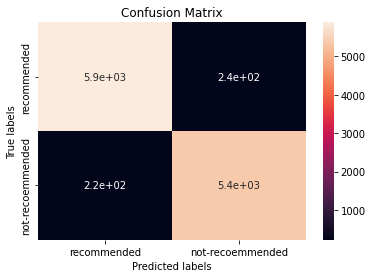

In [ ]:
# Geting the confusion matrix for test set

labels = ['recommended', 'not-recoemmended']
cm = confusion_matrix(y_test, test_class_preds)
print(cm)

ax= plt.subplot()
sns.heatmap(cm, annot=True, ax = ax) #annot=True to annotate cells

# labels, title and ticks
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.set_title('Confusion Matrix')
ax.xaxis.set_ticklabels(labels)
ax.yaxis.set_ticklabels(labels)

In [ ]:
#calling function to append evaluation metrices
Metric_df=evaluation_metric('Logistic Regression',y_test,test_class_preds,Metric_df)

#### 2. Cross- Validation & Hyperparameter Tuning

In [ ]:
from sklearn.model_selection import cross_validate

In [ ]:
# ML Model - 1 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)
logistic = LogisticRegression()
# Fit the Algorithm
scoring = ['accuracy']
scores = cross_validate(logistic,x_train, y_train, scoring = scoring, cv = 5, return_train_score=True,return_estimator=True,verbose = 10)


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] START .....................................................................
[CV] END ................ accuracy: (train=0.957, test=0.958) total time=   0.9s
[CV] START .....................................................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.9s remaining:    0.0s


[CV] END ................ accuracy: (train=0.957, test=0.957) total time=   0.9s
[CV] START .....................................................................


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    1.8s remaining:    0.0s


[CV] END ................ accuracy: (train=0.957, test=0.959) total time=   0.8s
[CV] START .....................................................................


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    2.7s remaining:    0.0s


[CV] END ................ accuracy: (train=0.958, test=0.955) total time=   0.9s
[CV] START .....................................................................


[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    3.6s remaining:    0.0s


[CV] END ................ accuracy: (train=0.958, test=0.955) total time=   0.8s


[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    4.5s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    4.5s finished


In [ ]:
# Predict on the model
scores['train_accuracy']

array([0.95743945, 0.95749268, 0.95698696, 0.95810599, 0.95773336])

In [ ]:
scores['test_accuracy']

array([0.95837326, 0.95698925, 0.95869264, 0.95464225, 0.95474872])

##### Which hyperparameter optimization technique have you used and why?

Answer Here.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Answer Here.

### ML Model - 2

In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
rf =RandomForestClassifier()
rf.fit(x_train,y_train)
score=rf.score(x_test,y_test)
print(f'Random Forest score : {score}')

Random Forest score : 0.9611617409079295


In [ ]:
test_pred = rf.predict(x_test)

[[5912  212]
 [ 244 5373]]


[Text(0, 0.5, 'recommended'), Text(0, 1.5, 'not-recoemmended')]

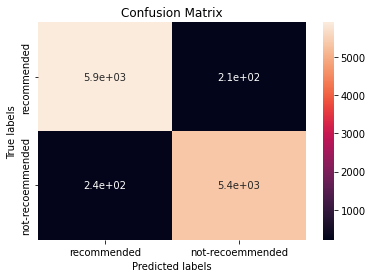

In [ ]:
# Geting the confusion matrix for test set

labels = ['recommended', 'not-recoemmended']
cm = confusion_matrix(y_test, test_pred)
print(cm)

ax= plt.subplot()
sns.heatmap(cm, annot=True, ax = ax) #annot=True to annotate cells

# labels, title and ticks
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.set_title('Confusion Matrix')
ax.xaxis.set_ticklabels(labels)
ax.yaxis.set_ticklabels(labels)

In [ ]:
#calling function to append evaluation metrices
Metric_df=evaluation_metric('Random forest',y_test,test_pred,Metric_df)

#### 2. Cross- Validation & Hyperparameter Tuning

In [ ]:
from sklearn.model_selection import GridSearchCV

In [ ]:
#Hyperparametric Tuning to get best parameter for evaluation
param_dict = {'n_estimators' : [50,80,100],
              'max_depth' : [6,8,10,12],
              'min_samples_split' : [10,50,100],
              'min_samples_leaf' : [30,40,50]}

In [ ]:
#using grid search variable
rf_grid = GridSearchCV(estimator=rf,
                       param_grid = param_dict,
                       cv = 5, verbose=2)

#Evaluating the optimal parameters
rf_grid.fit(x_train,y_train)
rf_grid.best_estimator_
     

Fitting 5 folds for each of 108 candidates, totalling 540 fits
[CV] END max_depth=6, min_samples_leaf=30, min_samples_split=10, n_estimators=50; total time=   0.7s
[CV] END max_depth=6, min_samples_leaf=30, min_samples_split=10, n_estimators=50; total time=   0.7s
[CV] END max_depth=6, min_samples_leaf=30, min_samples_split=10, n_estimators=50; total time=   0.7s
[CV] END max_depth=6, min_samples_leaf=30, min_samples_split=10, n_estimators=50; total time=   0.7s
[CV] END max_depth=6, min_samples_leaf=30, min_samples_split=10, n_estimators=50; total time=   0.8s
[CV] END max_depth=6, min_samples_leaf=30, min_samples_split=10, n_estimators=80; total time=   1.3s
[CV] END max_depth=6, min_samples_leaf=30, min_samples_split=10, n_estimators=80; total time=   1.2s
[CV] END max_depth=6, min_samples_leaf=30, min_samples_split=10, n_estimators=80; total time=   1.1s
[CV] END max_depth=6, min_samples_leaf=30, min_samples_split=10, n_estimators=80; total time=   1.1s
[CV] END max_depth=6, min_sa

RandomForestClassifier(max_depth=10, min_samples_leaf=30, min_samples_split=10)

In [ ]:
#getting best parameter from grid search
rf_grid.best_params_

{'max_depth': 10,
 'min_samples_leaf': 30,
 'min_samples_split': 10,
 'n_estimators': 100}

In [ ]:
best_rf = rf_grid.best_estimator_

In [ ]:
test_preds=best_rf.predict(x_test)

[[5911  213]
 [ 267 5350]]


[Text(0, 0.5, 'recommended'), Text(0, 1.5, 'not-recoemmended')]

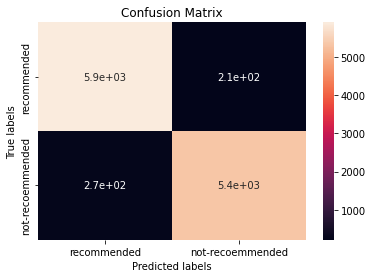

In [ ]:
# Geting the confusion matrix for test set

labels = ['recommended', 'not-recoemmended']
cm = confusion_matrix(y_test, test_preds)
print(cm)

ax= plt.subplot()
sns.heatmap(cm, annot=True, ax = ax) #annot=True to annotate cells

# labels, title and ticks
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.set_title('Confusion Matrix')
ax.xaxis.set_ticklabels(labels)
ax.yaxis.set_ticklabels(labels)

In [ ]:
#calling function to append evaluation metrices
Metric_df=evaluation_metric('Random Forest with GridSearchCV',y_test,test_preds,Metric_df)

In [ ]:
#For obtaining the which features has given the most importance 
features = x_train.columns
importances = best_rf.feature_importances_
indices = np.argsort(importances)

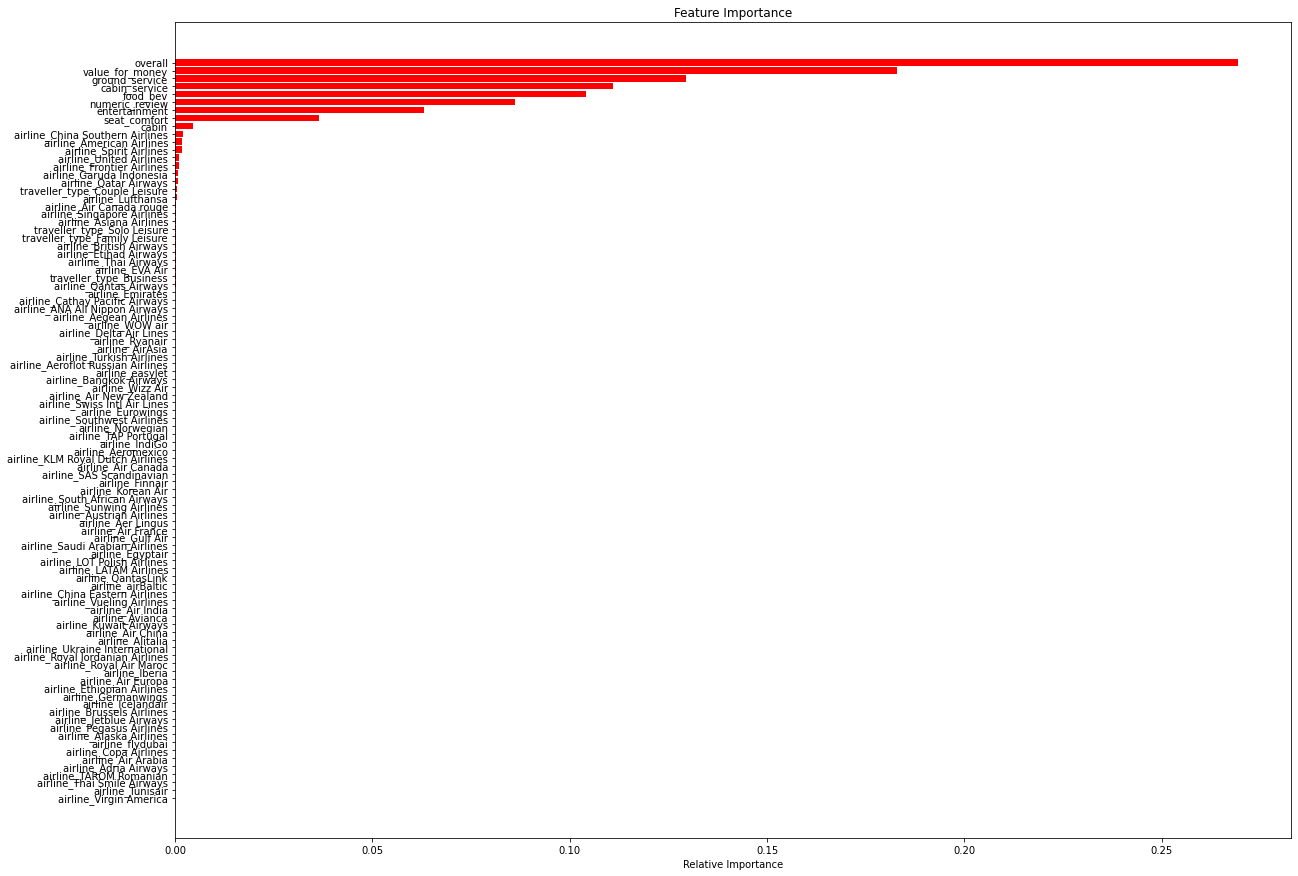

In [ ]:
plt.figure(figsize=(20,15))
plt.title('Feature Importance')
plt.barh(range(len(indices)), importances[indices], color='red', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')

plt.show()

### ML Model - 3

In [ ]:
from sklearn.naive_bayes import GaussianNB

In [ ]:
model = GaussianNB().fit(x_train,y_train)

In [ ]:
train_values = model.predict(x_train)
test_values = model.predict(x_test)

[[5514  610]
 [ 854 4763]]


[Text(0, 0.5, 'recommended'), Text(0, 1.5, 'not-recoemmended')]

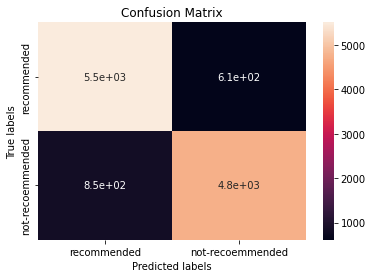

In [ ]:
# Geting the confusion matrix for test set

labels = ['recommended', 'not-recoemmended']
cm = confusion_matrix(y_test, test_values)
print(cm)

ax= plt.subplot()
sns.heatmap(cm, annot=True, ax = ax) #annot=True to annotate cells

# labels, title and ticks
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.set_title('Confusion Matrix')
ax.xaxis.set_ticklabels(labels)
ax.yaxis.set_ticklabels(labels)

In [ ]:
score=model.score(x_test,y_test)

In [ ]:
score

0.8753087471254578

In [ ]:
#calling function to append evaluation metrices
Metric_df=evaluation_metric('Navie bayes classifier',y_test,test_values,Metric_df)

### 1. Which Evaluation metrics did you consider for a positive business impact and why?

Answer Here.

### 2. Which ML model did you choose from the above created models as your final prediction model and why?

In [ ]:
Metric_df.drop('roc_auc_curve',axis = 1)

,Model,Accuracy,Recall,Precision,f1-score,roc_auc_score
0,Logistic Regression,0.960480,0.959943,0.957556,0.958748,0.960458
1,Logistic Regression,0.961162,0.956560,0.962041,0.959293,0.960971
2,Random Forest with GridSearchCV,0.959118,0.952466,0.961711,0.957066,0.958842
3,Navie bayes classifier,0.875309,0.847962,0.886469,0.866788,0.874177


Answer Here.

### 3. Explain the model which you have used and the feature importance using any model explainability tool?

Answer Here.

## ***8.*** ***Future Work (Optional)***

### 1. Save the best performing ml model in a pickle file or joblib file format for deployment process.


In [ ]:
# Save the File

### 2. Again Load the saved model file and try to predict unseen data for a sanity check.


In [ ]:
# Load the File and predict unseen data.

### ***Congrats! Your model is successfully created and ready for deployment on a live server for a real user interaction !!!***

# **Conclusion**



*   We can see that people have given both 1 or 0 which we will consider from now on as positive and negative recomendation so to interpret it effectively to the solo leisure. This may because of the poor infrastructure or the service recieved by the people and positive recommedation may be because of low price for solo. But this is approximate analysis based on the data provided.
*   Also we can see that people gives the high positive recommendation to economic class in cabin. From this we can conclude that people love to travel in economic class as of low price also in same way we can see people give highest negative recomendation to economy class maybe because less infrastrure or service provided to them. Also we can see people have given higest positive recommedation to Business class it may be because of the quality of service provided to them in Business class and simmilarly negative recoomendation because of high price of business class or less travelling percentage.

*   From month vs no. of recommendation. We can see that people tents to travel most in the month of July considering the total of positive and negative recommendation combined.
*   From overall vs recommended graph we can see which is perfectly understandable that negative recommendation has been given to the overall rating of 1.0 and high positive recommendation has been given to the overall rating of 10. But it is very true that highest negative recommendation has been given to overall rating of 1.0 which is really a matter of concern.

*  In cabin service rating people has given highest recommendation to rating to cabin service rating 5 as compare to its counterpart. From this we can conclude that cabin service is doing pretty good.
*   In food and beverage rating people have given highest negative recommendation to rating 1.0 from this we can conclude that airline service has to improve their food delivery and quality service.

*   In entertainment also we can see most people has given highest negative recommendation to entertaiment rating 1 which shows that airline has to improve their entertainment system as well.
*   In model Selection we can see that Random Forest and Grid searched RF is having the same high Model Accuracy with a score 0.967082 but we can also see that recall, precision, f1-score and roc_auc_score of Grid searched RF model combined is giving higher score than Random Forest from which we have chosen Random forest Model for further prediction.










### ***Hurrah! You have successfully completed your Machine Learning Capstone Project !!!***